C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\ipykernel_launcher.py:57: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 3325 samples, validate on 176 samples
Epoch 1/3
3325/3325 [==============================] - 9s 3ms/step - loss: 0.0351 - val_loss: 0.0232
Epoch 2/3
3325/3325 [==============================] - 9s 3ms/step - loss: 0.0063 - val_loss: 0.0187
Epoch 3/3
3325/3325 [==============================] - 9s 3ms/step - loss: 0.0044 - val_loss: 0.0089


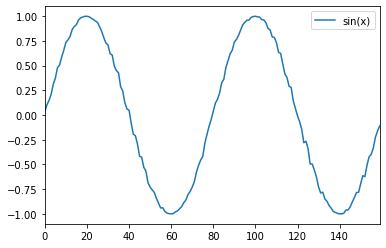

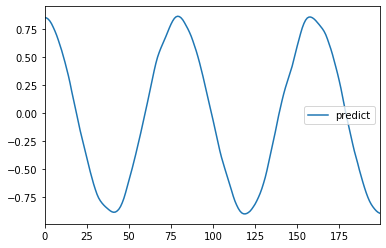

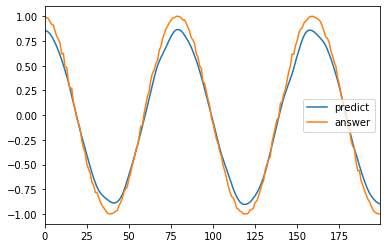

In [2]:
# 全体のプログラム
import pandas as pd
import numpy as np
import math
import random
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
#% matplotlib inline
import matplotlib.pyplot as plt

random.seed(0)
# 乱数の係数
random_factor = 0.05
# サイクルあたりのステップ数
steps_per_cycle = 80
# 生成するサイクル数
number_of_cycles = 50
# 入力の長さ
length_of_sequences = 100
# 入力値・出力値の次元の大きさ
in_out_neurons = 1
# 隠れ要素のニューロン数
hidden_neurons = 300

np_ary = np.arange(steps_per_cycle * number_of_cycles + 1);
df = pd.DataFrame(np_ary, columns=["x"])
pi_t = 2 * math.pi / steps_per_cycle
df["sin(x)"] = df.x.apply(lambda t: math.sin(t * pi_t + random.uniform(-1.0, +1.0) * random_factor))
df[["sin(x)"]].head(steps_per_cycle * 2).plot()

def Input_Ans_Extract(data, input_num = 100):
    InputList, AnsList = [], []
    for i in range(len(data) - input_num):
        InputData = data.iloc[i:i+input_num].as_matrix()
        AnsData = data.iloc[i+input_num].as_matrix()
        InputList.append(InputData)
        AnsList.append(AnsData)
    InputList_np = np.array(InputList)
    AnsList_np = np.array(AnsList)
    return InputList_np, AnsList_np

def Data_Split(df, test_size=0.1, input_num = 100):
    train_size = round(len(df) * (1 - test_size))
    train_size = int(train_size)
    Input_train, Ans_train = Input_Ans_Extract(df.iloc[0:train_size], input_num)
    Input_test, Ans_test = Input_Ans_Extract(df.iloc[train_size:], input_num)
    return (Input_train, Ans_train), (Input_test, Ans_test)

(Input_train, Ans_train), (Input_test, Ans_test) = Data_Split(df[["sin(x)"]], input_num = length_of_sequences)

model = Sequential()
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.fit(Input_train, Ans_train, batch_size=60, nb_epoch=3, validation_split=0.05)

predicted = model.predict(Input_test)

dataf =  pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf.plot()
dataf["answer"] = Ans_test[:200]
dataf.plot()
plt.show()